# FINAL PROJECT 2 
# Prediksi Cuaca Harian di Australia
Anggota Kelompok 8:
- Rijal Muhammad Farizky
- Diva Nabila

## Project Overview
### Latar Belakang
`Cuaca` menjadi faktor penting yang dapat mempengaruhi kehidupan sehari-hari di berbagai sektor ekonomi, termasuk pertanian, pariwisata, dan manajemen bencana. Di Australia, cuaca yang ekstrem seperti kekeringan dan banjir dapat memiliki dampak yang signifikan pada kehidupan dan ekonomi masyarakat. Oleh karena itu, pengembangan sistem prediksi cuaca yang akurat berdasarkan data historis adalah suatu kebutuhan mendesak.

Dataset `Rain in Australia` berisi pengamatan cuaca harian selama sekitar 10 tahun dari berbagai stasiun cuaca di Australia. Dengan dataset ini kita dapat melakukan eksplorasi dan membangun model machine learning untuk prediksi cuaca dengan baik.

### Tujuan
1. `Exploratory Data Analysis` : Melakukan eksplorasi data yang mendalam untuk memahami pola cuaca di Australia selama 10 tahun terakhir, mengidentifikasi tren, variabilitas musiman, dan hubungan antar variabel cuaca.

2. `Prediksi Cuaca Harian`: Mengembangkan model prediksi cuaca harian menggunakan dua pendekatan: `Logistic Regression` dan `Support Vector Machine (SVM)`.

3. `Evaluasi Model`: Mengukur kinerja model menggunakan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score. Melakukan perbandingan antara model Logistic Regression dan SVM untuk menentukan model mana yang memberikan prediksi terbaik.

4. `Implementasi dan Pengujian`: Melakukan deployment model Logistic Regression dan Support Vector Machine (SVM) ke dalam sistem yang dapat memberikan prediksi cuaca harian secara real-time berdasarkan data cuaca terbaru.

## Pustaka yang Digunakan

In [341]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,  precision_score, recall_score, accuracy_score, f1_score

import warnings
from sklearn.exceptions import ConvergenceWarning

import pickle


## Data Loading
Load Dataset

In [342]:
df_wth = pd.read_csv('../dataset/weatherAUS.csv')

Row and Column of Dataset

In [343]:
df_wth.shape

(145460, 23)

Dataset memiliki dimensi (baris, kolom): `(145460, 23)`

5 Data teratas

In [344]:
df_wth.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Informasi detail mengenai dataset

In [345]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Kesimpulan**

Berdasarkan informasi dari dataa yang sudah dimuat, diketahui bahwa data terdiri dari `145460 baris` dan `23 kolom`. Data tersebut masih terdapat missing value terlihat dari 23 kolom, hanya 2 kolom yang berisi data tidak null, yakni kolom Date dan Location. Maka dari itu, diperlukan pembersihan data.

## Data Cleaning

### Drop unused column

In [346]:
df_wth.drop("Date", axis=1, inplace=True)

Penghapusan kolom `Date` dilakukan karena tidak memiliki efek yang signifikan terhadap tujuan analisis.

### Examine Duplicated Values

Akan dilakukan pencarian duplikasi data

In [347]:
df_wth.duplicated().sum()

215

Berdasarkan output, terdapat `215` duplikasi data. Selanjutnya dilakukan penghapusan data yang duplikat.

In [348]:
df_wth.drop_duplicates(inplace=True)

In [349]:
df_wth.duplicated().sum()

0

Berdasarkan output, data duplikat telah dihapus.

### Examining Missing Values

Mencari data yang hilang atau tidak valid.

In [350]:
df_wth.isnull().sum()

Location             0
MinTemp           1270
MaxTemp           1052
Rainfall          3089
Evaporation      62576
Sunshine         69621
WindGustDir      10111
WindGustSpeed    10048
WindDir9am       10351
WindDir3pm        4013
WindSpeed9am      1552
WindSpeed3pm      2847
Humidity9am       2439
Humidity3pm       4292
Pressure9am      14850
Pressure3pm      14813
Cloud9am         55673
Cloud3pm         59143
Temp9am           1552
Temp3pm           3394
RainToday         3089
RainTomorrow      3097
dtype: int64

Berdasarkan output, hanya kolom `Location` yang tidak terdapat data yang hilang.

### Filling Missing Values


Melakukan pendefinisian numerical dan categorical data sebelum dilakukan filling missing values

In [351]:
numerical = [col for col in df_wth.columns if df_wth[col].dtype!='O']
categorical = [col for col in df_wth.columns if df_wth[col].dtype=='O']

#### Filling Numerical Columns

Melakukan filling numerical columns berdasarkan distribusi data. Jika data simetris dilakukan Fill NA dengan mean dan Fill NA dengan median jika data asimetris.

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

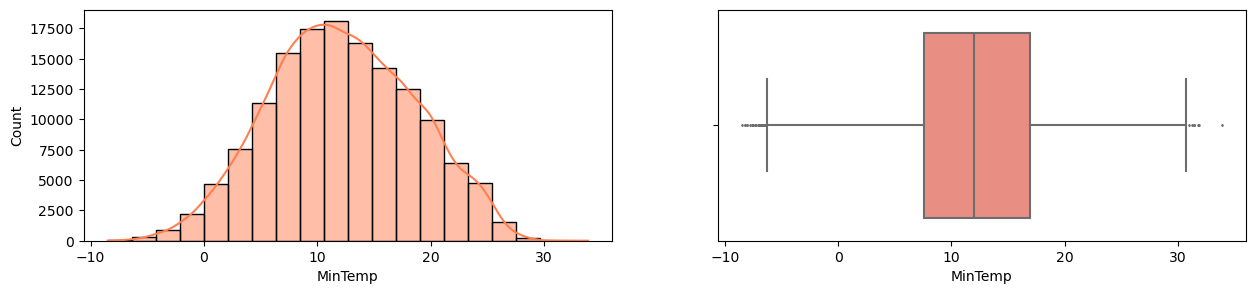

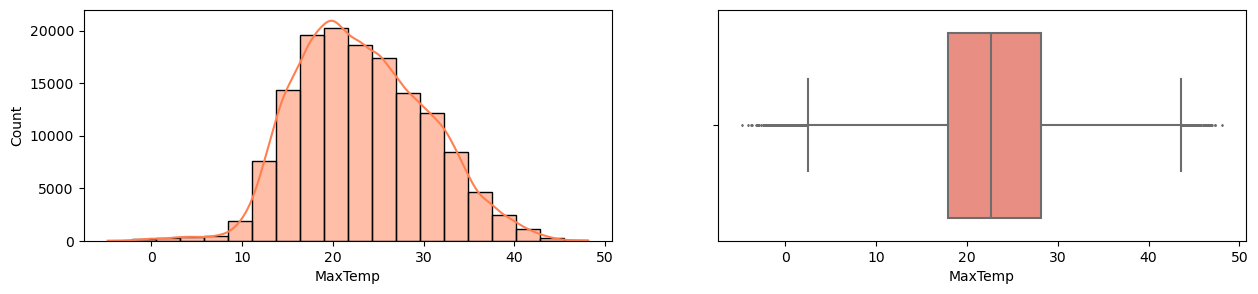

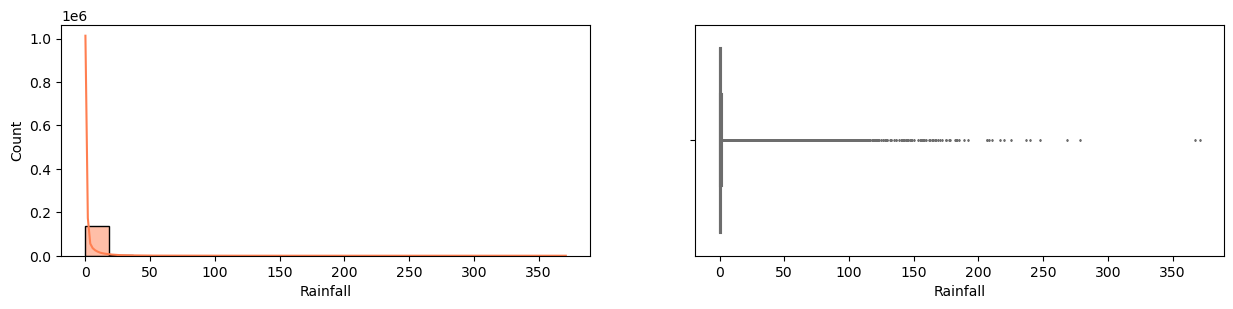

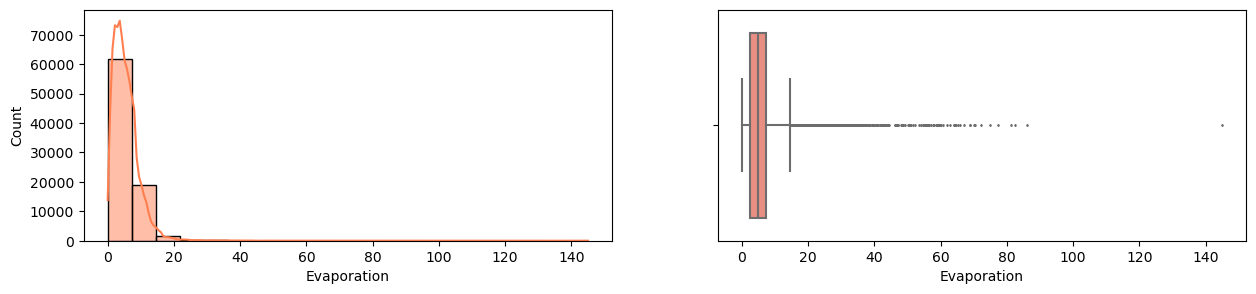

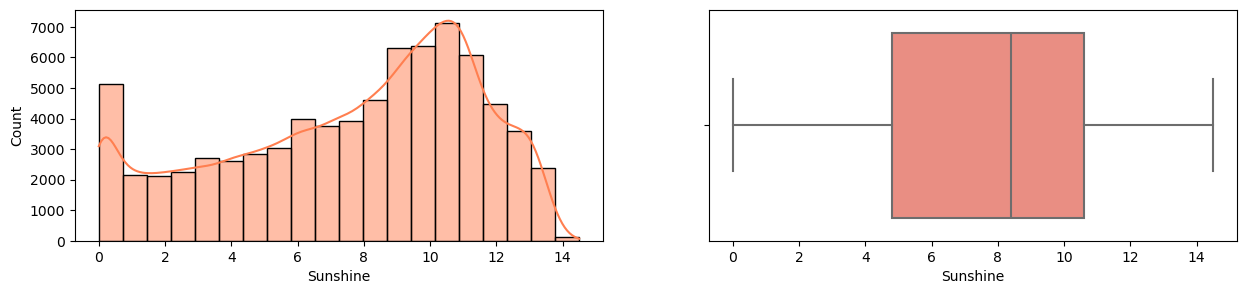

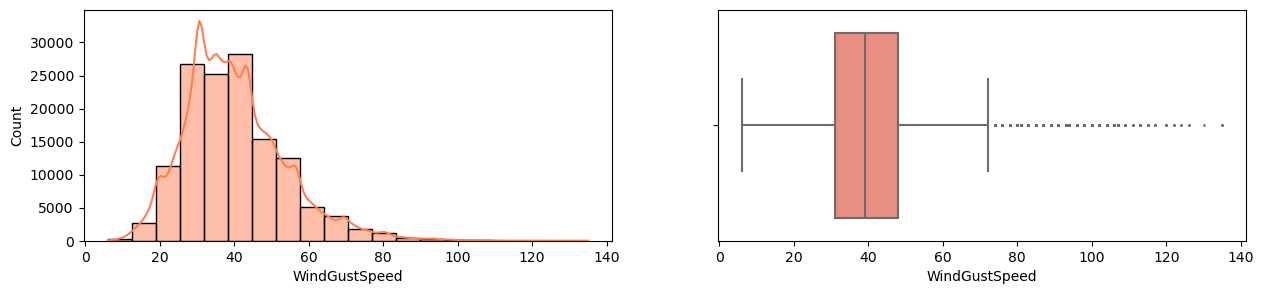

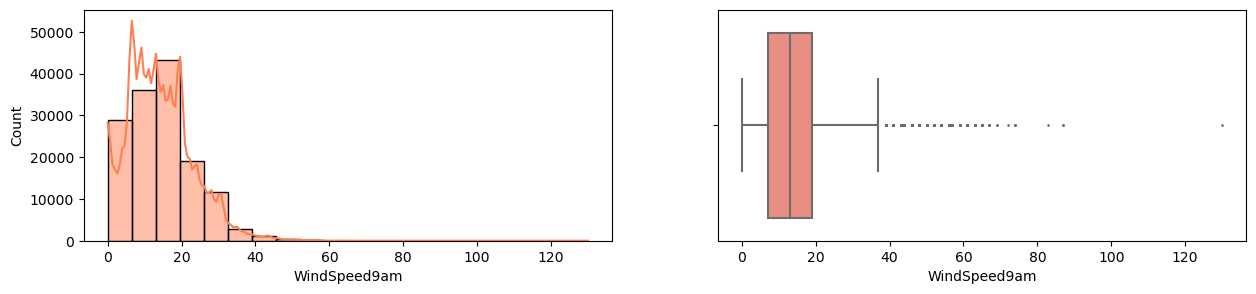

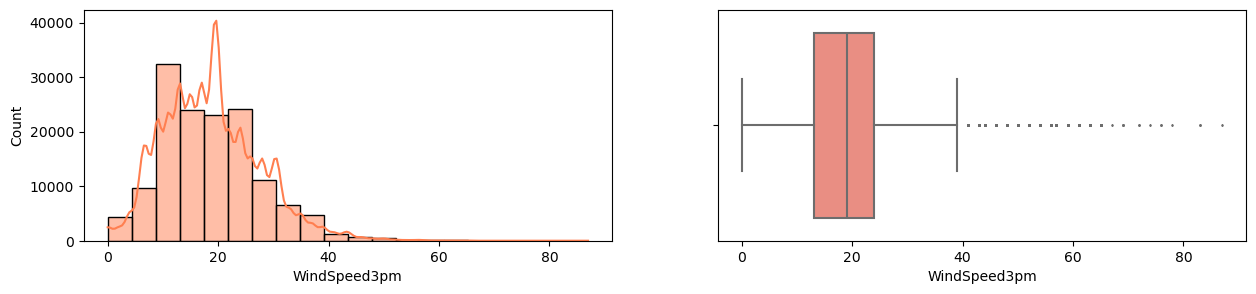

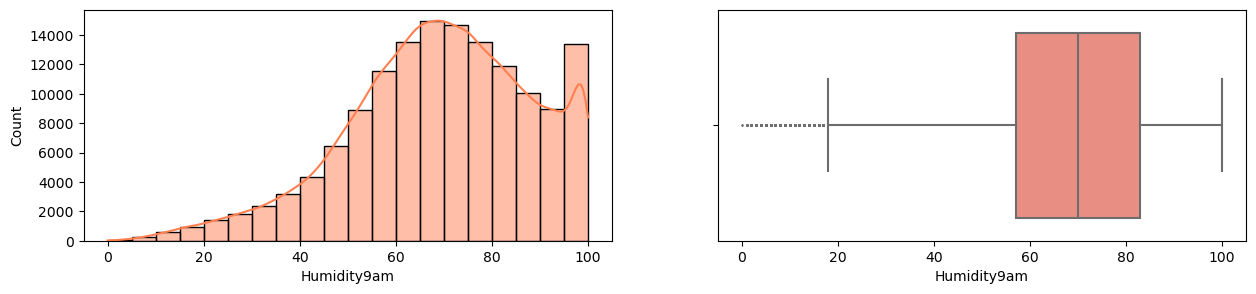

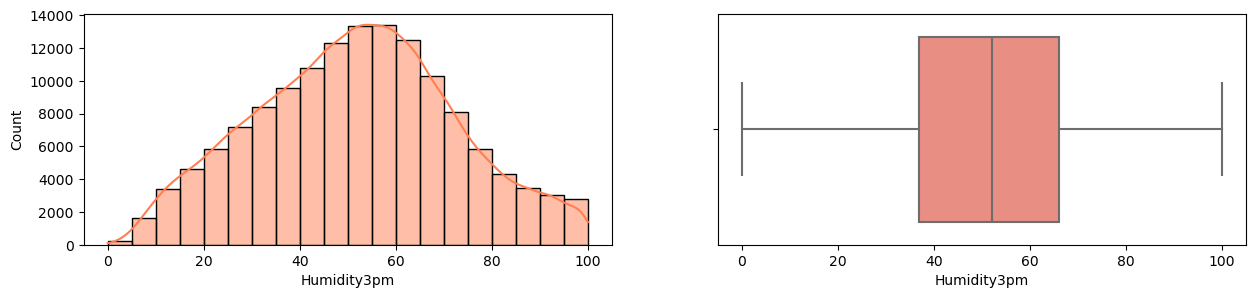

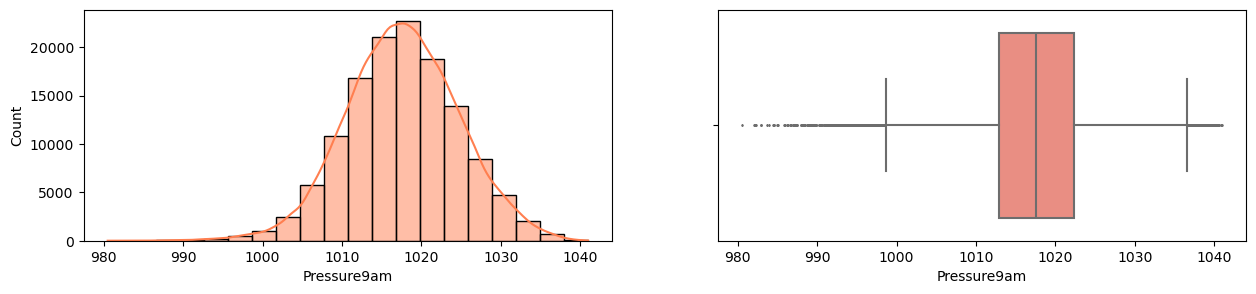

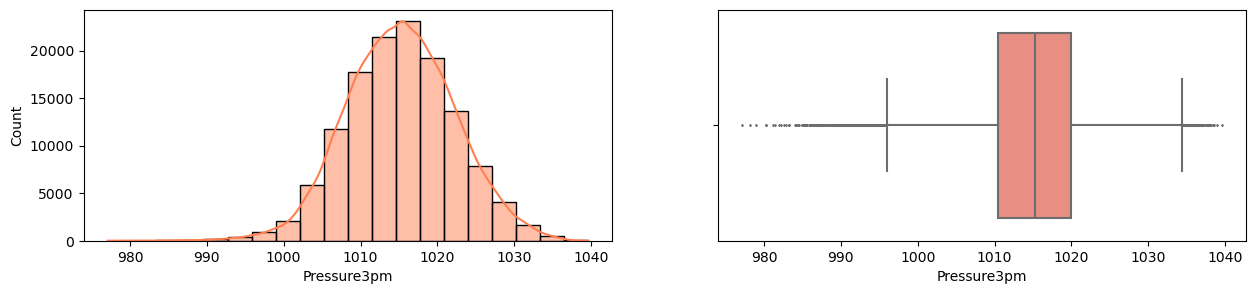

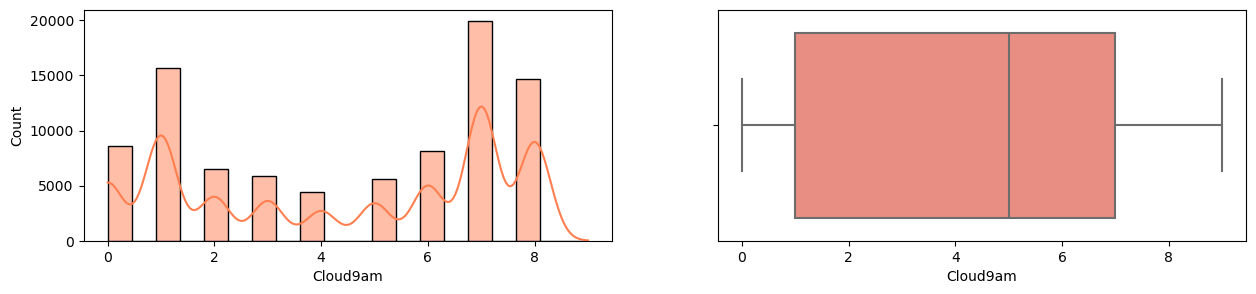

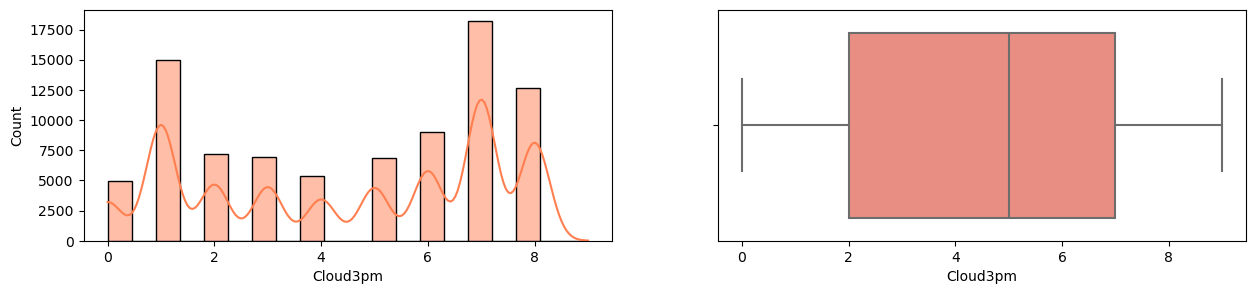

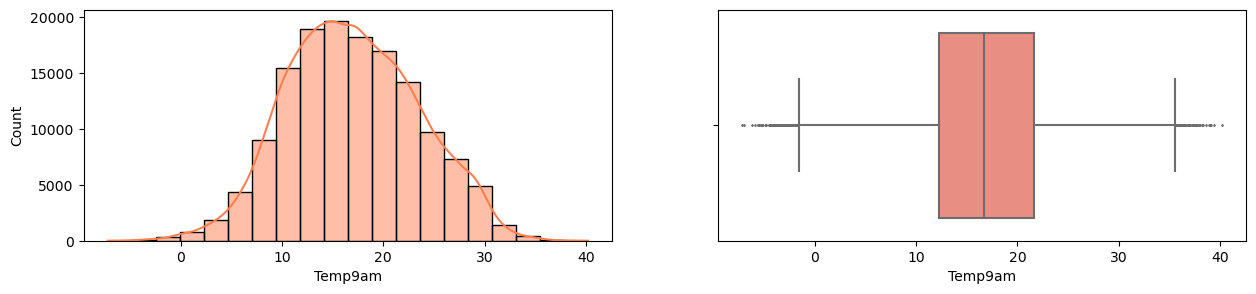

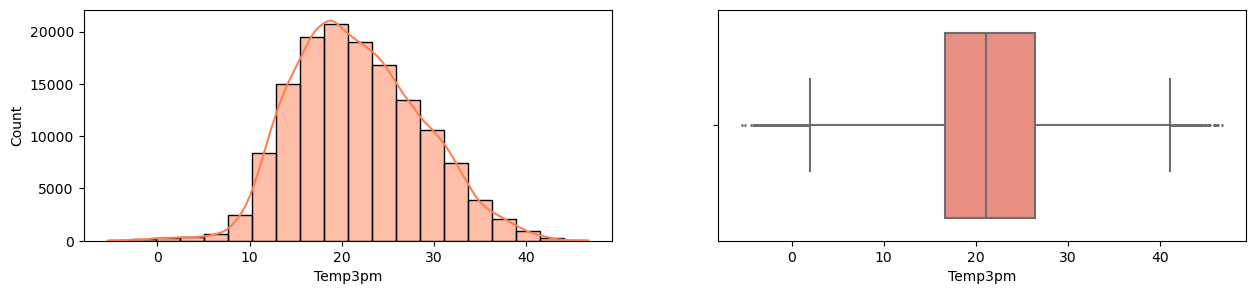

In [352]:
for i in numerical:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df_wth[i],bins=20, kde=True,ax=axs[0],color = 'coral')
    sns.boxplot(data = df_wth[i], x = df_wth[i], ax = axs[1], fliersize=1,color='salmon')

Berdasarkan visualisasi di atas akan dilakukan penghapusan Na pada kolom `Rainfall` karena memiliki terlalu banyak outlier. 

In [353]:
df_wth.dropna(subset=['Rainfall'], inplace=True)

Untuk mempertahankan karakteristik distribusi data dilakukan pengisian nilai yang hilang dengan nilai median pada kolom lainnya.

In [354]:
df_wth['MinTemp'].fillna(df_wth['MinTemp'].median(), inplace=True)
df_wth['MaxTemp'].fillna(df_wth['MaxTemp'].median(), inplace=True)
df_wth['Evaporation'].fillna(df_wth['Evaporation'].median(), inplace=True)
df_wth['Sunshine'].fillna(df_wth['Sunshine'].median(), inplace=True)
df_wth['WindGustSpeed'].fillna(df_wth['WindGustSpeed'].median(), inplace=True)
df_wth['WindSpeed9am'].fillna(df_wth['WindSpeed9am'].median(), inplace=True)
df_wth['WindSpeed3pm'].fillna(df_wth['WindSpeed3pm'].median(), inplace=True)
df_wth['Humidity9am'].fillna(df_wth['Humidity9am'].median(), inplace=True)
df_wth['Humidity3pm'].fillna(df_wth['Humidity3pm'].median(), inplace=True)
df_wth['Pressure9am'].fillna(df_wth['Pressure9am'].median(), inplace=True)
df_wth['Pressure3pm'].fillna(df_wth['Pressure3pm'].median(), inplace=True)
df_wth['Cloud9am'].fillna(df_wth['Cloud9am'].median(), inplace=True)
df_wth['Cloud3pm'].fillna(df_wth['Cloud3pm'].median(), inplace=True)
df_wth['Temp9am'].fillna(df_wth['Temp9am'].median(), inplace=True)
df_wth['Temp3pm'].fillna(df_wth['Temp3pm'].median(), inplace=True)

In [355]:
df_wth[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 142156 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142156 non-null  float64
 1   MaxTemp        142156 non-null  float64
 2   Rainfall       142156 non-null  float64
 3   Evaporation    142156 non-null  float64
 4   Sunshine       142156 non-null  float64
 5   WindGustSpeed  142156 non-null  float64
 6   WindSpeed9am   142156 non-null  float64
 7   WindSpeed3pm   142156 non-null  float64
 8   Humidity9am    142156 non-null  float64
 9   Humidity3pm    142156 non-null  float64
 10  Pressure9am    142156 non-null  float64
 11  Pressure3pm    142156 non-null  float64
 12  Cloud9am       142156 non-null  float64
 13  Cloud3pm       142156 non-null  float64
 14  Temp9am        142156 non-null  float64
 15  Temp3pm        142156 non-null  float64
dtypes: float64(16)
memory usage: 18.4 MB


Berdasarkan output, data numerical sudah tidak terdapat missing value.

#### Filling Categorical Columns

Menghitung jumlah nilai yang hilang pada data categorical

In [356]:
df_wth[categorical].isnull().sum()

Location           0
WindGustDir     9682
WindDir9am      9746
WindDir3pm      3756
RainToday          0
RainTomorrow    1411
dtype: int64

In [357]:
df_wth.dropna(subset=['RainToday','RainTomorrow'], axis=0, inplace=True)

Pada kolom `Rain Today` dan `Rain Tomorrow` dilakukan karena merupakan target dari data dan keduanya memiliki karakteristik data yang sama yang hanya bernilai 0 dan 1. Pada kolom `WindGustDir`, `WindDir9am`, `WindDir3pm` dilakukan pengisian nilai yang hilang dengan mode untuk menjaga distribusi data dengan mengisi nilai yang hilang dengan nilai yang paling umum.

In [358]:
df_wth['WindGustDir'].fillna(df_wth['WindGustDir'].mode()[0], inplace=True)
df_wth['WindDir9am'].fillna(df_wth['WindDir9am'].mode()[0], inplace=True)
df_wth['WindDir3pm'].fillna(df_wth['WindDir3pm'].mode()[0], inplace=True)

In [359]:
df_wth[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Berdasarkan output, data categorical sudah tidak terdapat missing value.

### Checking Outliers

In [360]:
print(round(df_wth[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140745.0  140745.0  140745.0     140745.0  140745.0       140745.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140745.0      140745.0     140745.0     140745.0     140745.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Berdasarkan data di atas, terlihat jika `Evaporation`, `WindGustSpeed`, `WindSpeed9am`, dan `WindSpeed3pm` memiliki jumlah outliers yang lebih banyak jika dibandingkan dengan kolom lain. Selanjutnya kita lihat visualisasinya.

Text(0, 0.5, 'Rainfall')

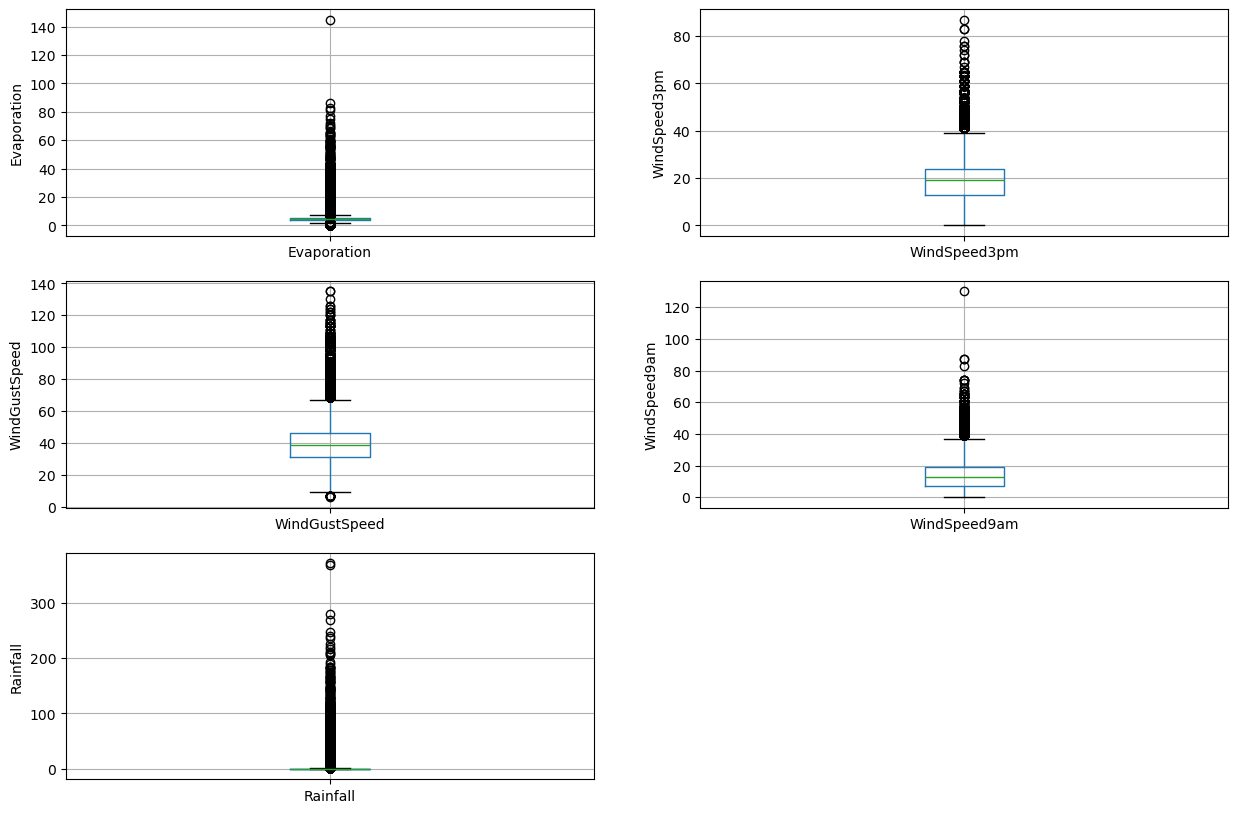

In [361]:
# Membuat box plots untuk memvisualisasikan outliers

plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = df_wth.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(3, 2, 2)
fig = df_wth.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(3, 2, 3)
fig = df_wth.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(3, 2, 4)
fig = df_wth.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

Titik -titik hitam pada gambar di atas merupakan outlier yang harus ditangani.

#### Distribution of Outliers

Memeriksa apakah atribut Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm dan Rainfall berdistribusi normal atau skewed dengan menggunakan plot histogram.

Text(0.5, 0, 'Rainfall')

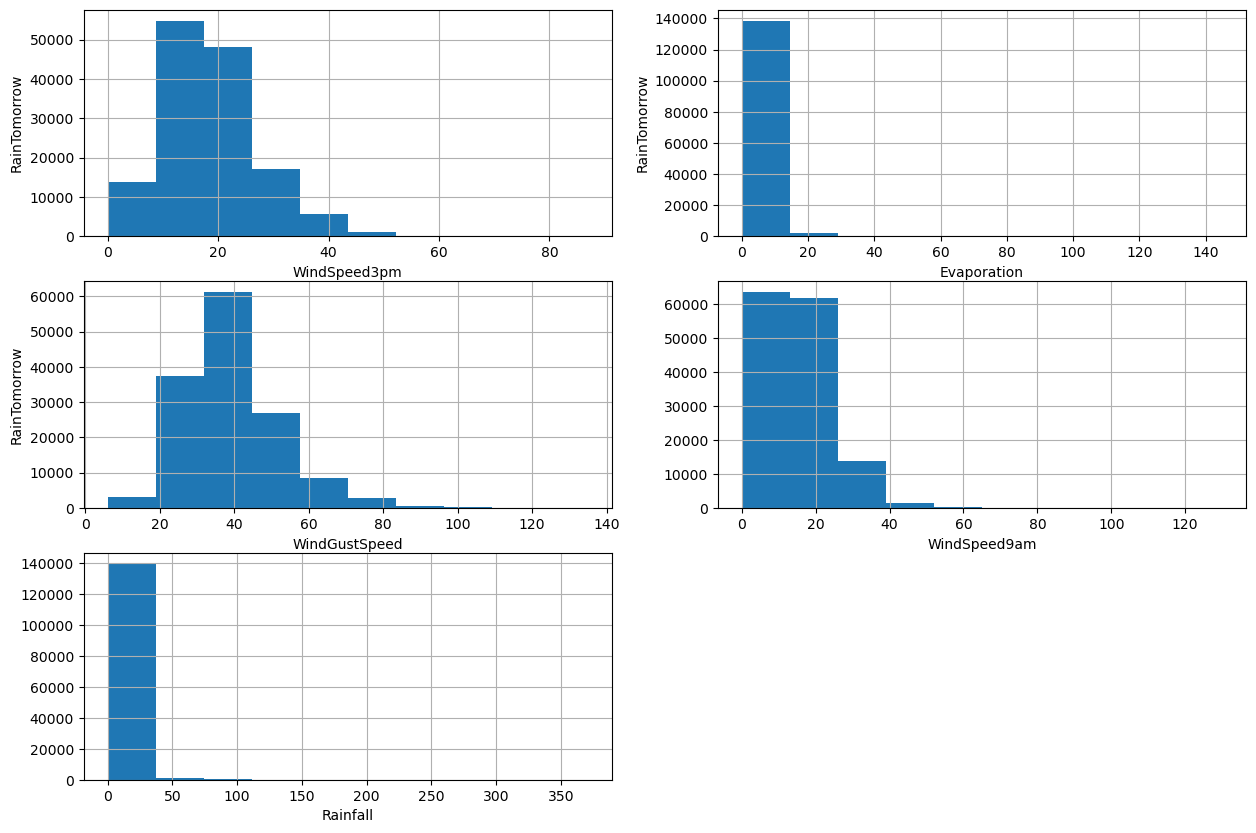

In [362]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = df_wth.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 2)
fig = df_wth.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 3)
fig = df_wth.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')


plt.subplot(3, 2, 4)
fig = df_wth.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')

Berdasarkan plot histagram di atas, terlihat jika semua variabel berdistribusi skewed, sehingga digunakan interquantile range untuk mencari outliers.

### Handling Outrlier With Interquantile Range

Menghitung rentang interkuartil (Interquartile Range atau IQR) dpada kolom `Evaporation`,`WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm` dan `Rainfall`

In [363]:
Q1 = (df_wth[['Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']]).quantile(0.25)
Q3 = (df_wth[['Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']]).quantile(0.75)

IQR= Q3-Q1

Menentukan batas atas dan batas bawah pada data

In [364]:
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

In [365]:
print('Nilai Maximum:\n', maximum)

Nilai Maximum:
 Evaporation       7.5
WindGustSpeed    68.5
WindSpeed9am     37.0
WindSpeed3pm     40.5
Rainfall          2.0
dtype: float64


Output di atas merupakan batas atas untuk menentukan outliers.

In [366]:
print('Nilai Minimum :\n', minimum)

Nilai Minimum :
 Evaporation       1.9
WindGustSpeed     8.5
WindSpeed9am    -11.0
WindSpeed3pm     -3.5
Rainfall         -1.2
dtype: float64


Tahapan diatas kita sudah menemukan nilai batas atas dan batas bawah. Selanjutnya, dilakukan penyesuaian data berdasarkan batas atas dan batas bawah yang sudah ditentukan.

In [367]:
# Align DataFrames along axis=1
df_wth, maximum = df_wth.align(maximum, axis=1, copy=False)
df_wth, minimum = df_wth.align(minimum, axis=1, copy=False)

# Create boolean masks
more_than = (df_wth > maximum)
lower_than = (df_wth < minimum)

# Perform masking
df_wth = df_wth.mask(more_than, maximum,  axis=1)
df_wth = df_wth.mask(lower_than, minimum,  axis=1)

In [368]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_wth[['Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']].describe())


Persebaran data setelah ditangani Outlier: 
         Evaporation  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  140745.000000  140745.000000  140745.000000  140745.000000   
mean        4.796335      39.592341      13.894682      18.551302   
std         1.635597      12.201998       8.555866       8.445993   
min         1.900000       8.500000       0.000000       0.000000   
25%         4.000000      31.000000       7.000000      13.000000   
50%         4.800000      39.000000      13.000000      19.000000   
75%         5.400000      46.000000      19.000000      24.000000   
max         7.500000      68.500000      37.000000      40.500000   

            Rainfall  
count  140745.000000  
mean        0.485868  
std         0.791925  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.800000  
max         2.000000  


Berdasarkan output diatas, terlihat bahwa outliers sudah teratasi dengan baik. Selanjutnya kita melakukan visualisasi data.

Text(0, 0.5, 'Rainfall')

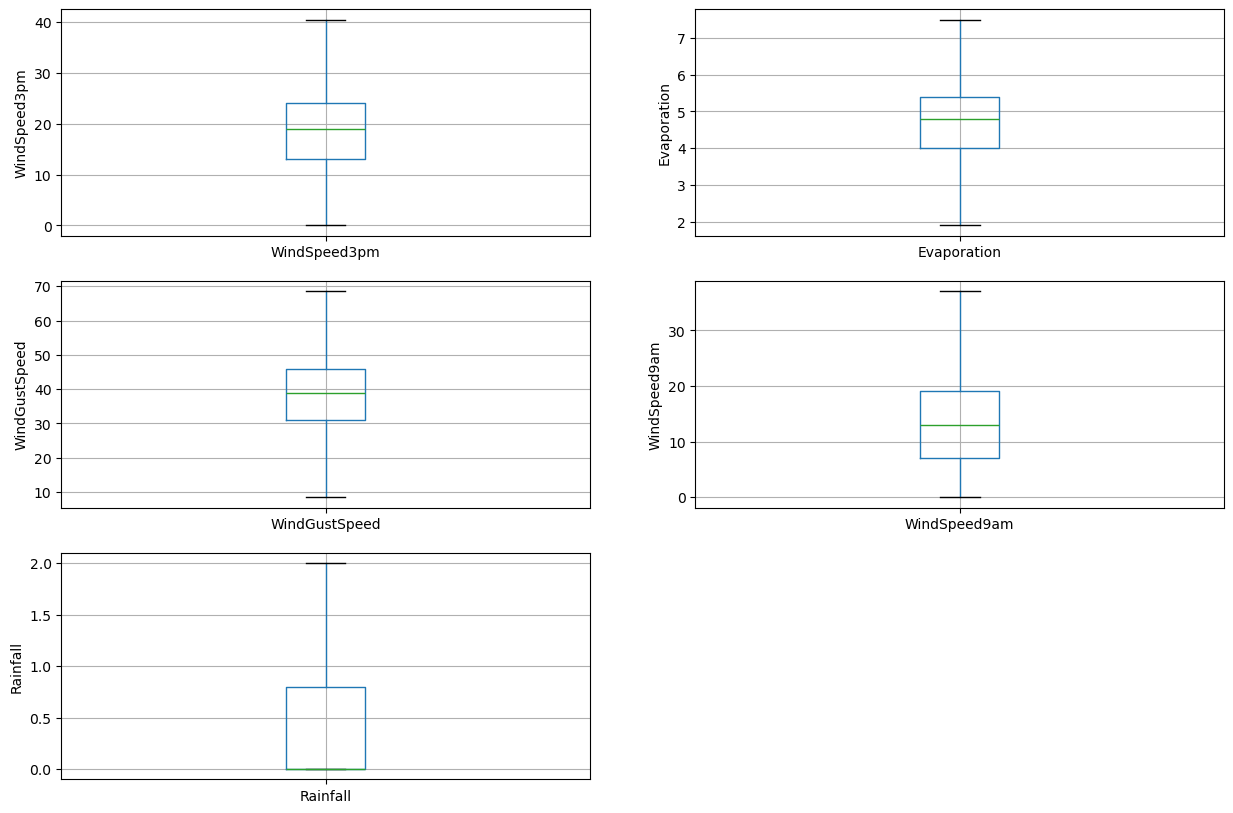

In [369]:
plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)
fig = df_wth.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(3, 2, 2)
fig = df_wth.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(3, 2, 3)
fig = df_wth.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(3, 2, 4)
fig = df_wth.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(3, 2, 5)
fig = df_wth.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

Sebelumnya kita sudah melakukan transformasi data dengan pendekatang IQR sehingga data sudah tidak memiliki outliers.

In [370]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140745 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cloud3pm       140745 non-null  float64
 1   Cloud9am       140745 non-null  float64
 2   Evaporation    140745 non-null  float64
 3   Humidity3pm    140745 non-null  float64
 4   Humidity9am    140745 non-null  float64
 5   Location       140745 non-null  object 
 6   MaxTemp        140745 non-null  float64
 7   MinTemp        140745 non-null  float64
 8   Pressure3pm    140745 non-null  float64
 9   Pressure9am    140745 non-null  float64
 10  RainToday      140745 non-null  object 
 11  RainTomorrow   140745 non-null  object 
 12  Rainfall       140745 non-null  float64
 13  Sunshine       140745 non-null  float64
 14  Temp3pm        140745 non-null  float64
 15  Temp9am        140745 non-null  float64
 16  WindDir3pm     140745 non-null  object 
 17  WindDir9am     140745 non-null  ob

**Kesimpulan**

Pada tahap Data cleaning kita sudah melakukan penghapusan kolom yang tidak diperlukan, menghapus duplikasi data, mengisi data yang hilang, dan mengatasi outlier pada beberapa kolom. Dari hasil duplikasi data terdapat perubahan dari yang sebelumnya `145460 baris` dan `23 kolom` menjadi `140745 baris` dan `22 kolom` .

## Exploratory Data Analysis (EDA)

Agar data dapat diolah, data dengan tipe data string diubah menjadi numerik pada kolom `RainTomorrow` dan `RainToday`

In [140]:
df_wth['RainTomorrow'] = df_wth['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_wth['RainToday'] = df_wth['RainToday'].map({'Yes': 1, 'No': 0})

### Measure of Central Tendency

Menghitung modus untuk mengetahui kejadian yang paling sering terjadi (hujan atau tidak).

In [141]:
print('Rain today: ',df_wth['RainToday'].mode())
print('Rain tomorrow: ',df_wth['RainTomorrow'].mode())

Rain today:  0    0
Name: RainToday, dtype: int64
Rain tomorrow:  0    0
Name: RainTomorrow, dtype: int64


Berdasarkan output di atas,  nilai 0 (Tidak hujan) menjadi kejadian yang paling sering terjadi di Australia selama 10 tahun terakhir

In [142]:
std_deviation = df_wth['RainTomorrow'].std()
print(f'Standard Deviation of RainTomorrow: {std_deviation}')

Standard Deviation of RainTomorrow: 0.4153814727314075


Nilai tersebut menggambarkan bahwa terdapat variasi cukup signifikan dalam nilai-nilai kolom `RainTomorrow` dari rata-ratanya.

### Measure Predict of each  Location

Melakukan grouping berdasarkan lokasi kemudian mengurutkan data untuk menemukan daerah dengan jumlah Rain Tomorrow terbanyak

In [143]:
df_loc = df_wth.groupby(by='Location').sum()
df_loc = df_loc[['RainTomorrow']]
df_loc = df_loc.sort_values(by="RainTomorrow",ascending=True)

Melakukan visualisasi dari grouping yang telah dilakukan.

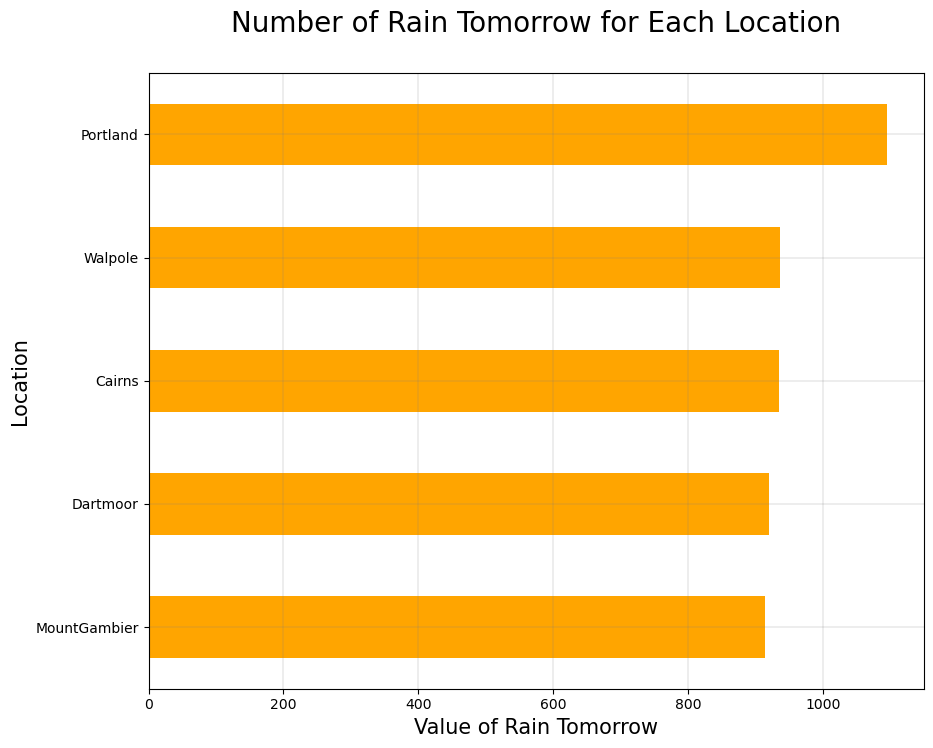

In [144]:
df_loc.tail().plot(kind="barh",
               figsize=(10,8),
               legend=False,
               color='orange')
plt.title("Number of Rain Tomorrow for Each Location\n", fontsize=20)
plt.xlabel("Value of Rain Tomorrow", fontsize=15)
plt.ylabel("Location", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Berdasarkan barplot dan informasi di atas, diketahui bahwa daerah Portland memiliki jumlah rata-rata prediksi terjadinya hujan pada hari esok paling tinggi dengan 4 daerah lainnya yaitu `Walpole`, `Cairns`, `Dartmoor`, `MountGambier` menduduki 5 daerah teratas dengan jumlah presiksi terbanyak.

### Visualisasi Target

Target dari dataset ini adalah `RainTomorrow`, mari kita lihat persebaran data dari tiap unique value yang dimiliki.

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


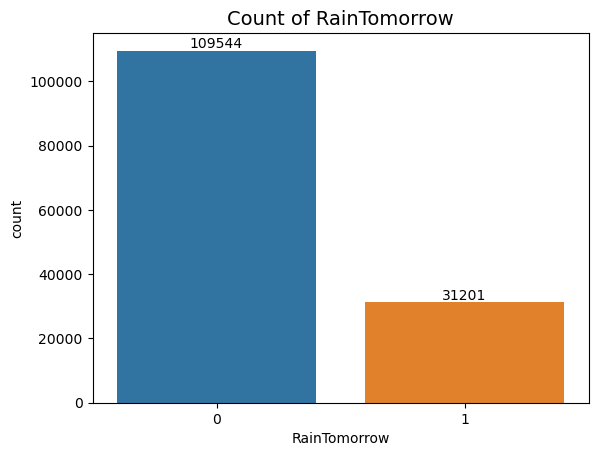

In [145]:
ax = sns.countplot(x=df_wth['RainTomorrow'])
ax.set_title('Count of RainTomorrow', fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)

Terlihat bahwa jumlah `No` pada kolom RainTomorrow adalah sebanyak `96318` data, sedangkan untuk jumlah `Yes` adalah `27392`.

### Correlation of RainTomorrow with All Attributes

Menemukan fitur yang berkolerasi dengan Target `Rain Tomorrow`. Sebelum itu, kita perlu melakukan encode atau transformasi data categorical.

In [146]:
encode = LabelEncoder()
df_wth.WindGustDir = encode.fit_transform(df_wth.WindGustDir)
df_wth.WindDir9am = encode.fit_transform(df_wth.WindDir9am)
df_wth.WindDir3pm = encode.fit_transform(df_wth.WindDir3pm)
df_wth.Location= encode.fit_transform(df_wth.Location)

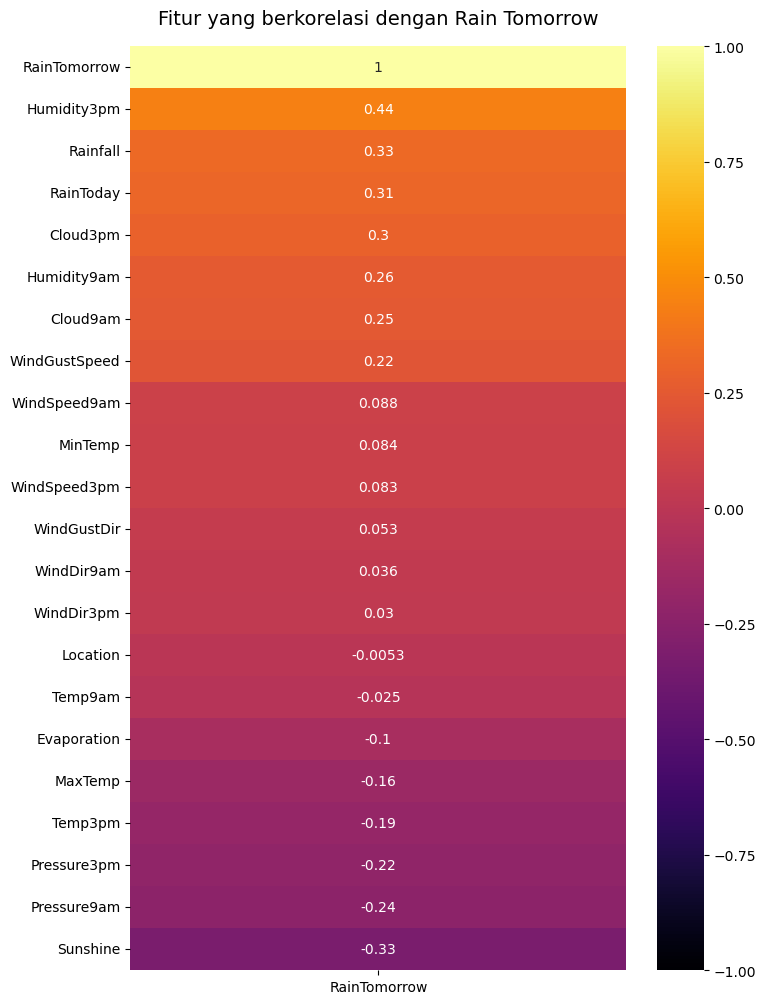

In [147]:
plt.figure(figsize=(8, 12))
hm1 = sns.heatmap(df_wth.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm1.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':14}, pad=16);

Dapat dilihat bahwa fitur yang berkorelasi positif dengan kolom 'RainTomorrow' adalah `Humidity3pm`, `Rainfall`, `RainToday`dan `Cloud3pm`. Fitur yang berkorelasi negatif yaitu kolom `Sunshine`, `Pressure9am`, `Pressure 3pm` Sedangkan, fitur tidak berkorelasi atau nilainya mendekati 0 adalah `Location`, `WindDir3pm`, dan `Temp9am`.

## Data Preprocessing

#### Checking Tipe Data

Memeriksa kesesuaian tipe data sebelum melakukan pemodelan

In [148]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140745 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cloud3pm       140745 non-null  float64
 1   Cloud9am       140745 non-null  float64
 2   Evaporation    140745 non-null  float64
 3   Humidity3pm    140745 non-null  float64
 4   Humidity9am    140745 non-null  float64
 5   Location       140745 non-null  int64  
 6   MaxTemp        140745 non-null  float64
 7   MinTemp        140745 non-null  float64
 8   Pressure3pm    140745 non-null  float64
 9   Pressure9am    140745 non-null  float64
 10  RainToday      140745 non-null  int64  
 11  RainTomorrow   140745 non-null  int64  
 12  Rainfall       140745 non-null  float64
 13  Sunshine       140745 non-null  float64
 14  Temp3pm        140745 non-null  float64
 15  Temp9am        140745 non-null  float64
 16  WindDir3pm     140745 non-null  int64  
 17  WindDir9am     140745 non-null  in

Berdasarkan detail informasi, terlihat seluruh data bertipe numerik. Hal ini dapat terjadi, karena kolom categorical sudah diencode pada tahapan sebelumnya.

#### Correlation Matrix Among Attributes

Selanjutnya melakukan perhitung korelasi matriks antar atribut untuk menemukan hubungan antar atribut.

In [149]:
correlation = df_wth.corr()

Agar korelasi antar atribut dapat terlihat jelas, hasil perhitungan divisualisasikan dengan heatmap

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


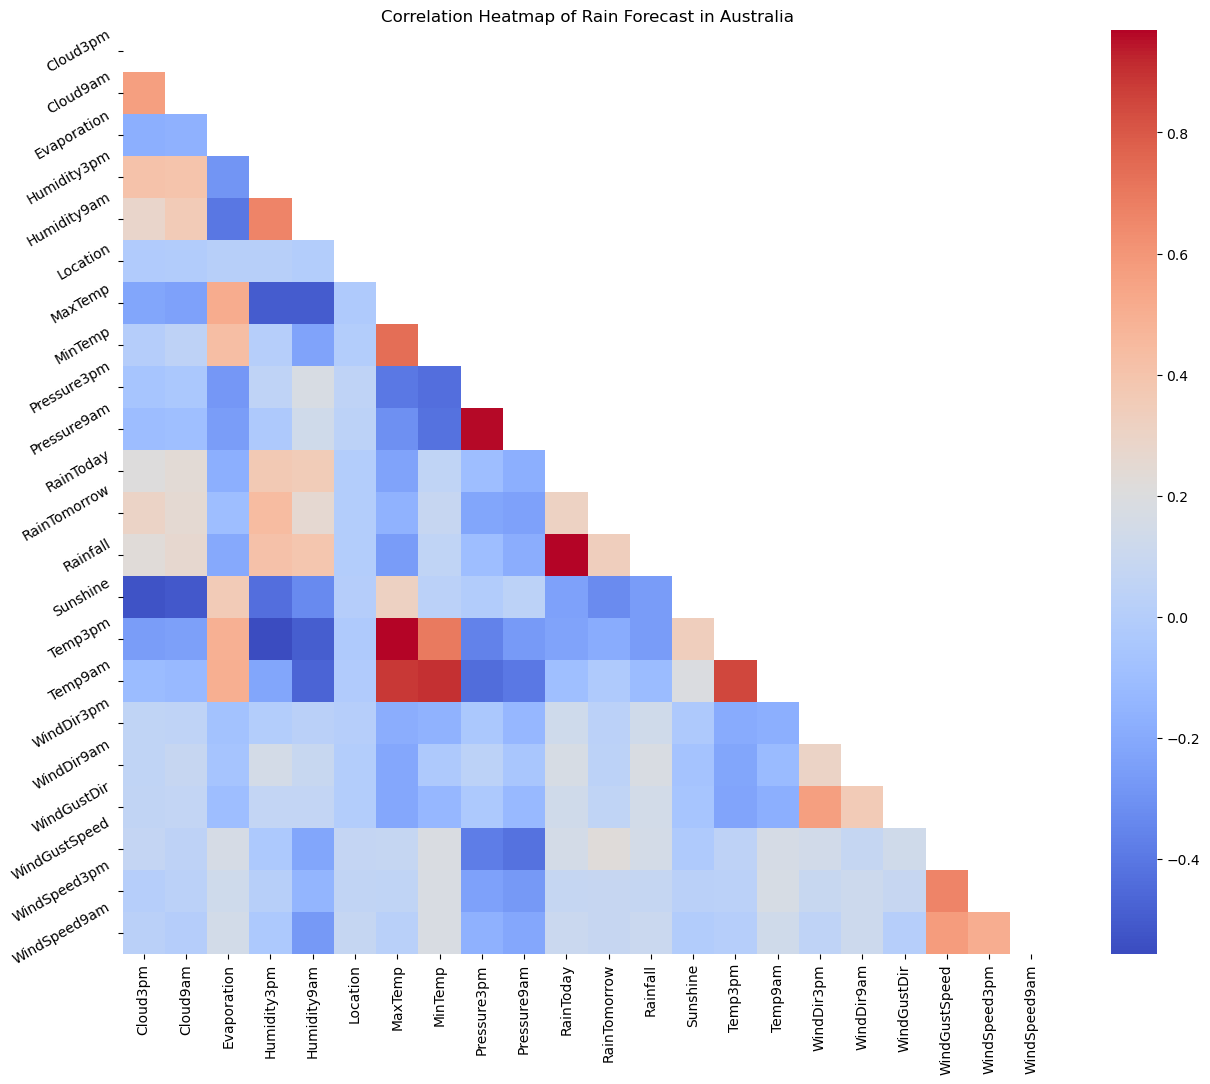

In [150]:
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(15, 12))
plt.title('Correlation Heatmap of Rain Forecast in Australia')

ax = sns.heatmap(correlation, annot=True,mask=mask, cmap='coolwarm')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

plt.show()

Berdasarkan Heatmap terlihat bahwa terdapat multikolinearitas/ korelasi tinggi antar Fitur `MaxTemp-Temp3pm` dan `Pressure9am-Pressure3pm`, sehingga salah satu fitur yang berkorelasi harus dihapus. Fitur yang dihapus yaitu `Temp3pm` dan `Pressure3pm`.

In [151]:
df_wth.drop(['Temp3pm', 'Pressure3pm'], axis=1, inplace=True)

In [152]:
df_wth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140745 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Cloud3pm       140745 non-null  float64
 1   Cloud9am       140745 non-null  float64
 2   Evaporation    140745 non-null  float64
 3   Humidity3pm    140745 non-null  float64
 4   Humidity9am    140745 non-null  float64
 5   Location       140745 non-null  int64  
 6   MaxTemp        140745 non-null  float64
 7   MinTemp        140745 non-null  float64
 8   Pressure9am    140745 non-null  float64
 9   RainToday      140745 non-null  int64  
 10  RainTomorrow   140745 non-null  int64  
 11  Rainfall       140745 non-null  float64
 12  Sunshine       140745 non-null  float64
 13  Temp9am        140745 non-null  float64
 14  WindDir3pm     140745 non-null  int64  
 15  WindDir9am     140745 non-null  int64  
 16  WindGustDir    140745 non-null  int64  
 17  WindGustSpeed  140745 non-null  fl

Dari tahapan preprocessing yang sudah dilakukan, data yang akan digunakan pada tahap modelling berjumlah `140745` baris dan `19` kolom.

### Feature Selection

Pada tahap ini akan dilakukan feature selection dengan menggunakan `Recursive Features Elimintation(RFE)`. Penggunaan RFE karena memungkinkan penyesuaian fitur secara adaptif dan mampu mencegah overfitting. Sebelum lanjut, akan dilakukan pemisahan atribut dan target.

In [236]:
X = df_wth.drop(["RainTomorrow"], axis=1)
Y = df_wth['RainTomorrow']

`ConvergenceWarning` digunakan untuk menghindari tumpukan warning saat menjalankan RFE.

In [252]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Selanjutnya kita mendefinisikan model `LogisticRegression` untuk diinputkan ke RFE dengan mencari 6 fitur terbaik untuk melakukan logistic regression.

In [253]:
model = LogisticRegression() 
rfe = RFE(model, n_features_to_select= 6) 
rfe.fit(X, Y) 

RFE(estimator=LogisticRegression(), n_features_to_select=6)

Selanjutnya mengeluarkan index hasil dari `RFE`.

In [254]:
index_of_value = np.where(rfe.support_ == True)
index_of_value

(array([ 1,  3,  9, 10, 11, 16]),)

Dengan menggunakan index yang sudah dikeluarkan sebelumnya, kita melakukan pencarian nama kolom/atribut berdasarkan index dari `DataFrame X` yang merupakan kumpulan attributes secara keseluruhan.

In [255]:
X.iloc[:,[1,  3,  9, 10, 11, 16]].columns

Index(['Cloud9am', 'Humidity3pm', 'RainToday', 'Rainfall', 'Sunshine',
       'WindGustSpeed'],
      dtype='object')

Berdasarkan output dari RFE maka atribut yang akan digunakan adalah:
- Cloud9am
- Humidity3pm
- RainToday
- Rainfall
- Sunshine
- WindGustSpeed

Selanjutnya, mendefinisikan X_fit yang merupakan data dengan 6 atribut di atas. X_fit ini yang nantinya akan digunakan dalam pelatihan model.


In [275]:
X_fit = df_wth[['Cloud9am', 'Humidity3pm', 'RainToday', 'Rainfall', 'Sunshine','WindGustSpeed']]

### Splitting Dataset

Melakukan pembagian data menjadi data uji dan data latih dengan rasio 7:3. Data latih akan dimasukkan ke dalam model untuk dilatih, data test kemudian digunakan untuk menguji hasil prediksi model.

In [276]:
X_train, X_test, y_train, y_test= train_test_split(X_fit, Y, test_size=0.3)

**Kesimpulan**

Data yang digunakan untuk pemodelan berdimensi berjumlah `140745` baris dan `19` kolom dengan 6 atribut yaitu  Cloud9am, Humidity3pm, RainToday, Rainfall, Sunshine dan WindGustSpeed

## Pendefinisan Model

Mendefinisikan model `Logistic Regression` dan `Several Vector Machine` yang digunakan untuk melakukan prediksi.

In [277]:
logreg = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear')
svm = SVC(class_weight='balanced')

- Parameter pada `Logistic Regression`: Semakin kecil nilai C, semakin tinggi regularisasi, yang dapat membantu menghindari overfitting pada model. Dalam konteks penanganan ketidakseimbangan kelas, nilai C=0.8 menunjukkan bahwa kita memberikan tingkat regularisasi yang cukup tinggi agar model tidak terlalu memperhatikan setiap titik data secara individual. Parameter `class_weight='balanced'`memberikan bobot yang seimbang kepada kelas. Selanjutnya parameter optimasi`solver='liblinear` digunakan karena efektif untuk klasifikasi biner.
- Parameter pada `SVM` menggunakan parameter `class_weight='balanced'`memberikan bobot yang seimbang kepada kelas. Kernel `linear` digunakan karena mudah diinterpretasikan dan efisien untuk dimensi fitur tinggi.

## Pelatihan Model

Melakukan pelatihan data pada model logistic regression 

In [278]:
logreg_model = logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_pred_lr

array([0, 0, 1, ..., 1, 1, 1])

Output di atas merupakan kumpulan data (List) hasil prediksi data uji menggunakan model logistic regression. Selanjutnya kita melakukan pelatihan data pada model SVM.

In [279]:
svm_model = svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 1, ..., 1, 0, 1])

Output di atas merupakan kumpulan data (List) hasil prediksi data uji menggunakan model SVM.

## Evaluasi Model

Untuk mengevaluasi performa model, akan digunakan penghitungan confusion matrix yang mana hasilnya akan digunakan kembali untuk menghitung `accuracy`, `precision`, `recall` dan `f1-score`. Sekarang kita akan melakukan menghitung confusion matrix dari model `Logistic Regression`.

In [291]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

Hasil perhitungan confusion matrix hasil prediksi logistic regression divisualisasikan menggunakan heatmap.

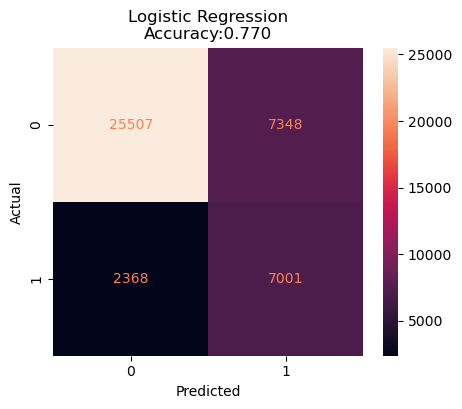

In [292]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=12)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)

for i in range(len(cm_lr)):
    for j in range(len(cm_lr[i])):
        text = plt.text(j + 0.5, i + 0.5, str(cm_lr[i, j]), color='coral',
                        ha='center', va='center', fontsize=10)
plt.show()

Berdasarkan hasil perhitungan confusion matrix Logistic Regression didapatkan rincian sebagai berikut:
- True Positive (TP): 25507
- True Negative (TN): 7001
- False Positive (FP): 7348
- False Negative (FN): 2368

Selanjutnya menghitung `accuracy`, `precision`, `recall` dan `f1-score`model LR.

In [293]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_lr))
print('Precision Score:', precision_score(y_test,y_pred_lr))
print('Recall Score:', recall_score(y_test,y_pred_lr))
print('F1 Score:',f1_score(y_test,y_pred_lr))

Accuracy Score: 0.769893899204244
Precision Score: 0.48790856505679836
Recall Score: 0.7472515743409115
F1 Score: 0.5903533181549877


Didapatkan nilai seperti di atas. Selanjutnya, menghitung confusion matrix hasil prediksi SVM.

In [294]:
# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

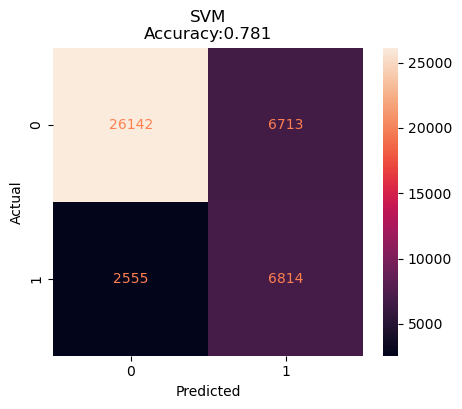

In [295]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=12)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)

for i in range(len(cm_svm)):
    for j in range(len(cm_svm[i])):
        text = plt.text(j + 0.5, i + 0.5, str(cm_svm[i, j]), color='coral',
                        ha='center', va='center', fontsize=10)
plt.show()

Heat map di atas merupakan hasil perhitungan confusion matrix dari model SVM dengan rincian sebagai berikut:
- True Positive (TP): 26142
- True Negative (TN): 6814
- False Positive (FP): 6713
- False Negative (FN): 2555

Kemudian menghitung kembali `accuracy`, `precision`, `recall` dan `f1-score`dari model SVM.

In [296]:
print('Accuracy Score:', accuracy_score(y_test, y_pred_svm))
print('Precision Score:', precision_score(y_test,y_pred_svm))
print('Recall Score:', recall_score(y_test,y_pred_svm))
print('F1 Score:',f1_score(y_test,y_pred_svm))

Accuracy Score: 0.7805039787798409
Precision Score: 0.503733274192356
Recall Score: 0.7272921336321913
F1 Score: 0.5952131376659678


Perbandingan antara hasil evaluasi model `Logistic Regression `dengan `SVM` adalah sebagai berikut:
1. `Accuracy Score`: LR model memperoleh akurasi sebesar 76.99%, sementara SVM Model memiliki akurasi sebesar 78.05%. Akurasi mengukur sejauh mana model berhasil mengklasifikasikan dengan benar seluruh instance. Oleh karena itu, model pada percobaan kedua memberikan performa lebih baik dalam hal akurasi.
Precision Score:

2. `Precision`: Nilai precision pada LR Model 48.79%, sedangkan SVM Model adalah 50.37%. Precision mengukur seberapa baik model dapat mengidentifikasi jumlah positif sebenarnya dari semua instance yang diprediksi positif. Dalam hal ini, percobaan kedua juga memberikan nilai precision yang lebih tinggi.

3. `Recall Score`: Recall pada LR model adalah 74.73%, sementara pada SVM Model diperoleh 72.73%. Recall mengukur seberapa baik model dapat mengidentifikasi seluruh instance positif yang sebenarnya. Meskipun recall pada percobaan pertama lebih tinggi, perbedaannya tidak terlalu signifikan.

4. `F1 score` pada LR model adalah 59.04%, sedangkan pada p SVM Model diperoleh  59.52%. F1 score adalah harmonic mean dari precision dan recall, sehingga mencerminkan keseimbangan antara keduanya. Dalam hal ini, percobaan kedua memberikan nilai F1 score yang sedikit lebih tinggi.

**Kesimpulan**

Berdasarkan percobaan yang sudah dilakukan dan hasil perbandingan, model SVM memberikan kinerja yang lebih baik dalam hal akurasi, precision, recall, dan F1 score. Oleh karena itu, secara umum, model SVM lebih baik daripada Model LR. Namun, meskipun model SVM memiliki nilai metrik evaluasi yang relatif baik, masih ada ruang untuk peningkatan pada model tersebut.

# Model Inference

### Menyimpan model

Menyimpan model dengan pickle

In [297]:
pickle.dump(logreg_model, open('model_lr.pkl','wb'))
pickle.dump(svm_model, open('model_svm.pkl','wb'))

### Load Model

Melakukan load model yang sebelumnya sudah disimpan, sebelum itu kita harus mendefinisikan lokasi folder di directory local tempat model tersimpan.

In [298]:
model_path = ['/home/rmfarizky/Hacktiv8-Learncode/project/model_lr.pkl',
              '/home/rmfarizky/Hacktiv8-Learncode/project/model_svm.pkl']

Melakukan load model dengan pickel.

In [299]:
# Load the model
with open(model_path[0], 'rb') as file:
    lr_model = pickle.load(file)

with open(model_path[1], 'rb') as file:
    svm_model = pickle.load(file)

Selanjutnya, kita akan melakukan prediksi dengan model yang sudah dibuat. Sebelum lanjut, kita definisikan input yang akan dimasukkan berdasarkan input yang diterima oleh model yaitu `['Cloud9am', 'Humidity3pm', 'RainToday', 'Rainfall', 'Sunshine','WindGustSpeed']`.

In [322]:
# ['Cloud9am', 'Humidity3pm', 'RainToday', 'Rainfall', 'Sunshine','WindGustSpeed']
val = [[5.0, 91.0, 1, 2.0, 8.5, 68.5],
       [5.0, 22.0, 1, 0.0, 8.5, 30.0]]

variabel val di atas merupakan contoh input yang dimasukkan ke dalam model berdasarkan input model.

### Predict with The Model

Melakukan prediksi dengan model Logistic Regression dengan menggunakan varivale val yang merupakan data inputan user.

In [334]:
prediction_lr = lr_model.predict(val)

# Print or use the predictions as needed
for i in prediction_lr:
    if(prediction_lr[i] == 1):
        print('Hasil prediksi bernilai', prediction_lr[i], 'Besok akan Terjadi Hujan' )
    elif(prediction_lr[i] == 0):
        print('Hasil prediksi bernilai', prediction_lr[i], 'Besok Tidak Hujan')

Hasil prediksi bernilai 0 Besok Tidak Hujan
Hasil prediksi bernilai 1 Besok akan Terjadi Hujan


/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Logistic Regression sudah berhasil membaca data inputan user dan memprediksi apakah besok akan terjadi hujan di Australia. Selanjutnya kita melakukan prediksi dengan model SVM.

In [372]:
prediction_svm = svm_model.predict(val)

# Print or use the predictions as needed
for i in prediction_svm:
    if(prediction_svm[i] == 1):
        print('Hasil prediksi bernilai', prediction_svm[i], 'Besok akan Terjadi Hujan' )
    elif(prediction_svm[i] == 0):
        print('Hasil prediksi bernilai', prediction_svm[i], 'Besok Tidak Hujan')

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Hasil prediksi bernilai 0 Besok Tidak Hujan
Hasil prediksi bernilai 1 Besok akan Terjadi Hujan


Keluaran hasil prediksi dari model SVM memiliki keluaran yang sama dengan model Logistic Regression. 

**Kesimpulan**

Dalam tahapan ini kita sudah berhasil melakukan inferensi model, dengan menyimpan model dalam format pickle, kemudian melakukan load kembali dan kedua model sudah berhasil melakukan prediksi berdasarkan inputan dari user.

# Conclusion

1. `Exploratory Data Analysis`:
Berdasarkan hasil EDA, dapat disimpulkan bahwa dalam 10 tahun terakhir, fenomena hujan di Australia cenderung jarang terjadi. Faktor-faktor yang memiliki pengaruh signifikan terhadap terjadinya hujan meliputi tingkat kelembapan pada pukul 3 sore (Humidity3pm), jumlah curah hujan (Rainfall), keberadaan hujan pada hari tersebut (RainToday), dan kondisi awan pada pukul 3 sore (Cloud3pm). 

2. `Prediksi Cuasa`:
Model prediksi cuaca harian dikembangkan menggunakan dua pendekatan, yaitu Logistic Regression dan Support Vector Machine (SVM). Kedua model dikembangkan dengan pelatihan data historis dengan attributes '`Cloud9am`, `Humidity3pm`,`RainToday`,`Rainfall`,`Sunshine`,`WindGustSpeed`.

3. `Evaluasi Model`: 
Kinerja model dievaluasi menggunakan metrik evaluasi `akurasi`, `presisi`, `recall`, dan `F1-score`. Perbandingan performa antara model `Logistic Regression` dan `SVM ` menunjukkan bahwa model `SVM` relatif lebih baik dibandingkan dengan model `Logistic Regression`.

4. `Implementasi dan Pengujian Model`:
Model Logistic Regression dan SVM diimplementasikan dan disimpan menggunakan `pickle` kemudian model disematkan kembali untuk diuji dengan emnggunakan data inputan user. Kedua model sudah berhasil memprediksi cuaca di hari esok dengan baik.